In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
import model.util as model_util
import model.mechint_net as mechint_net
import feature.simulated_dataset as simulated_dataset
import feature.util as feature_util
import train.train_model as train_model
import train.performance as performance
import analysis.motif_util as motif_util
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logomaker
import scipy.signal
import scipy.special

In [2]:
# Plotting defaults
plot_params = {
    "figure.titlesize": 22,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "Roboto",
    "font.weight": "bold",
    "svg.fonttype": "none"
}
plt.rcParams.update(plot_params)

In [3]:
if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"

### Define constants and paths

In [4]:
base_path = "/projects/site/gred/resbioai/tsenga5/mechint_regnet/"

In [5]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/spi1_sanit_single/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_sanit_single_config.json")
# neg_motif_config_path = None

In [6]:
# # model_path = os.path.join(base_path, "models/trained_models/simulated/spi1_exp_single/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_l1_loss_to_1e-3/spi1_exp_single/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_l1_loss_to_1e-4/spi1_exp_single/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e4/spi1_exp_single/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e3/spi1_exp_single/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_sparsemax/spi1_exp_single/2/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_attentreg/spi1_exp_single/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_exp_single_config.json")
# neg_motif_config_path = None

In [7]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/tal_gata_sanit_mix/4/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/tal_gata_sanit_mix_config.json")
# neg_motif_config_path = None

In [8]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/tal_gata_exp_mix/1/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_l1_loss_to_1e-3/tal_gata_exp_mix/3/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_l1_loss_to_1e-4/tal_gata_exp_mix/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e4/tal_gata_exp_mix/3/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e3/tal_gata_exp_mix/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/tal_gata_exp_mix_config.json")
# neg_motif_config_path = None

In [9]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_sanit_coop_noneg/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_sanit_coop_config.json")
# neg_motif_config_path = None

In [10]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_exp_coop_noneg/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_config.json")
# neg_motif_config_path = None

In [11]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_sanit_coop/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_sanit_coop_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_sanit_coop_neg_config.json")

In [12]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/e2f6_max_exp_coop/mechint_net/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/e2f6_max_exp_coop_neg_config.json")

In [13]:
# # model_path = os.path.join(base_path, "models/trained_models/simulated/spi1_ctcf_exp_repress/1/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_sparsemax/spi1_ctcf_exp_repress/3/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_attentreg/spi1_ctcf_exp_repress/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_ctcf_exp_repress_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/spi1_ctcf_exp_repress_neg_config.json")

In [14]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/jund_tead_sanit_hard_spacing/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/jund_tead_sanit_hard_spacing_config.json")
# neg_motif_config_path = None

In [15]:
# # model_path = os.path.join(base_path, "models/trained_models/simulated/jund_tead_exp_hard_spacing/2/last_ckpt.pth")
# # model_path = os.path.join(base_path, "models/trained_models/simulated_sparsemax/jund_tead_exp_hard_spacing/1/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_attentreg/jund_tead_exp_hard_spacing/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/jund_tead_exp_hard_spacing_config.json")
# neg_motif_config_path = None

In [16]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_sanit_soft_spacing/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_soft_spacing_config.json")
# neg_motif_config_path = None

In [17]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_soft_spacing/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_soft_spacing_config.json")
# neg_motif_config_path = None

In [18]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_sanit_both_noneg/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_both_config.json")
# neg_motif_config_path = None

In [19]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_both_noneg/3/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_config.json")
# neg_motif_config_path = None

In [20]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_sanit_both/2/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_both_config.json")
# neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_sanit_both_neg_config.json")

In [21]:
# model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_both/3/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_sparsemax/rest_exp_both/2/last_ckpt.pth")
model_path = os.path.join(base_path, "models/trained_models/simulated/rest_exp_both/mechint_net/2/last_ckpt.pth")
motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_config.json")
neg_motif_config_path = os.path.join(base_path, "data/simulations/configs/rest_exp_both_neg_config.json")

In [22]:
# # model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e3/ctcf_exp_soft_spacing/1/last_ckpt.pth")
# model_path = os.path.join(base_path, "models/trained_models/simulated_over_loss_to_1e4/ctcf_exp_soft_spacing/1/last_ckpt.pth")
# motif_config_path = os.path.join(base_path, "data/simulations/configs/ctcf_exp_soft_spacing_config.json")
# neg_motif_config_path = None

### Show training curves

In [23]:
metrics_path = os.path.join(os.path.dirname(model_path), "metrics.json")
with open(metrics_path, "r") as f:
    metrics = json.load(f)

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

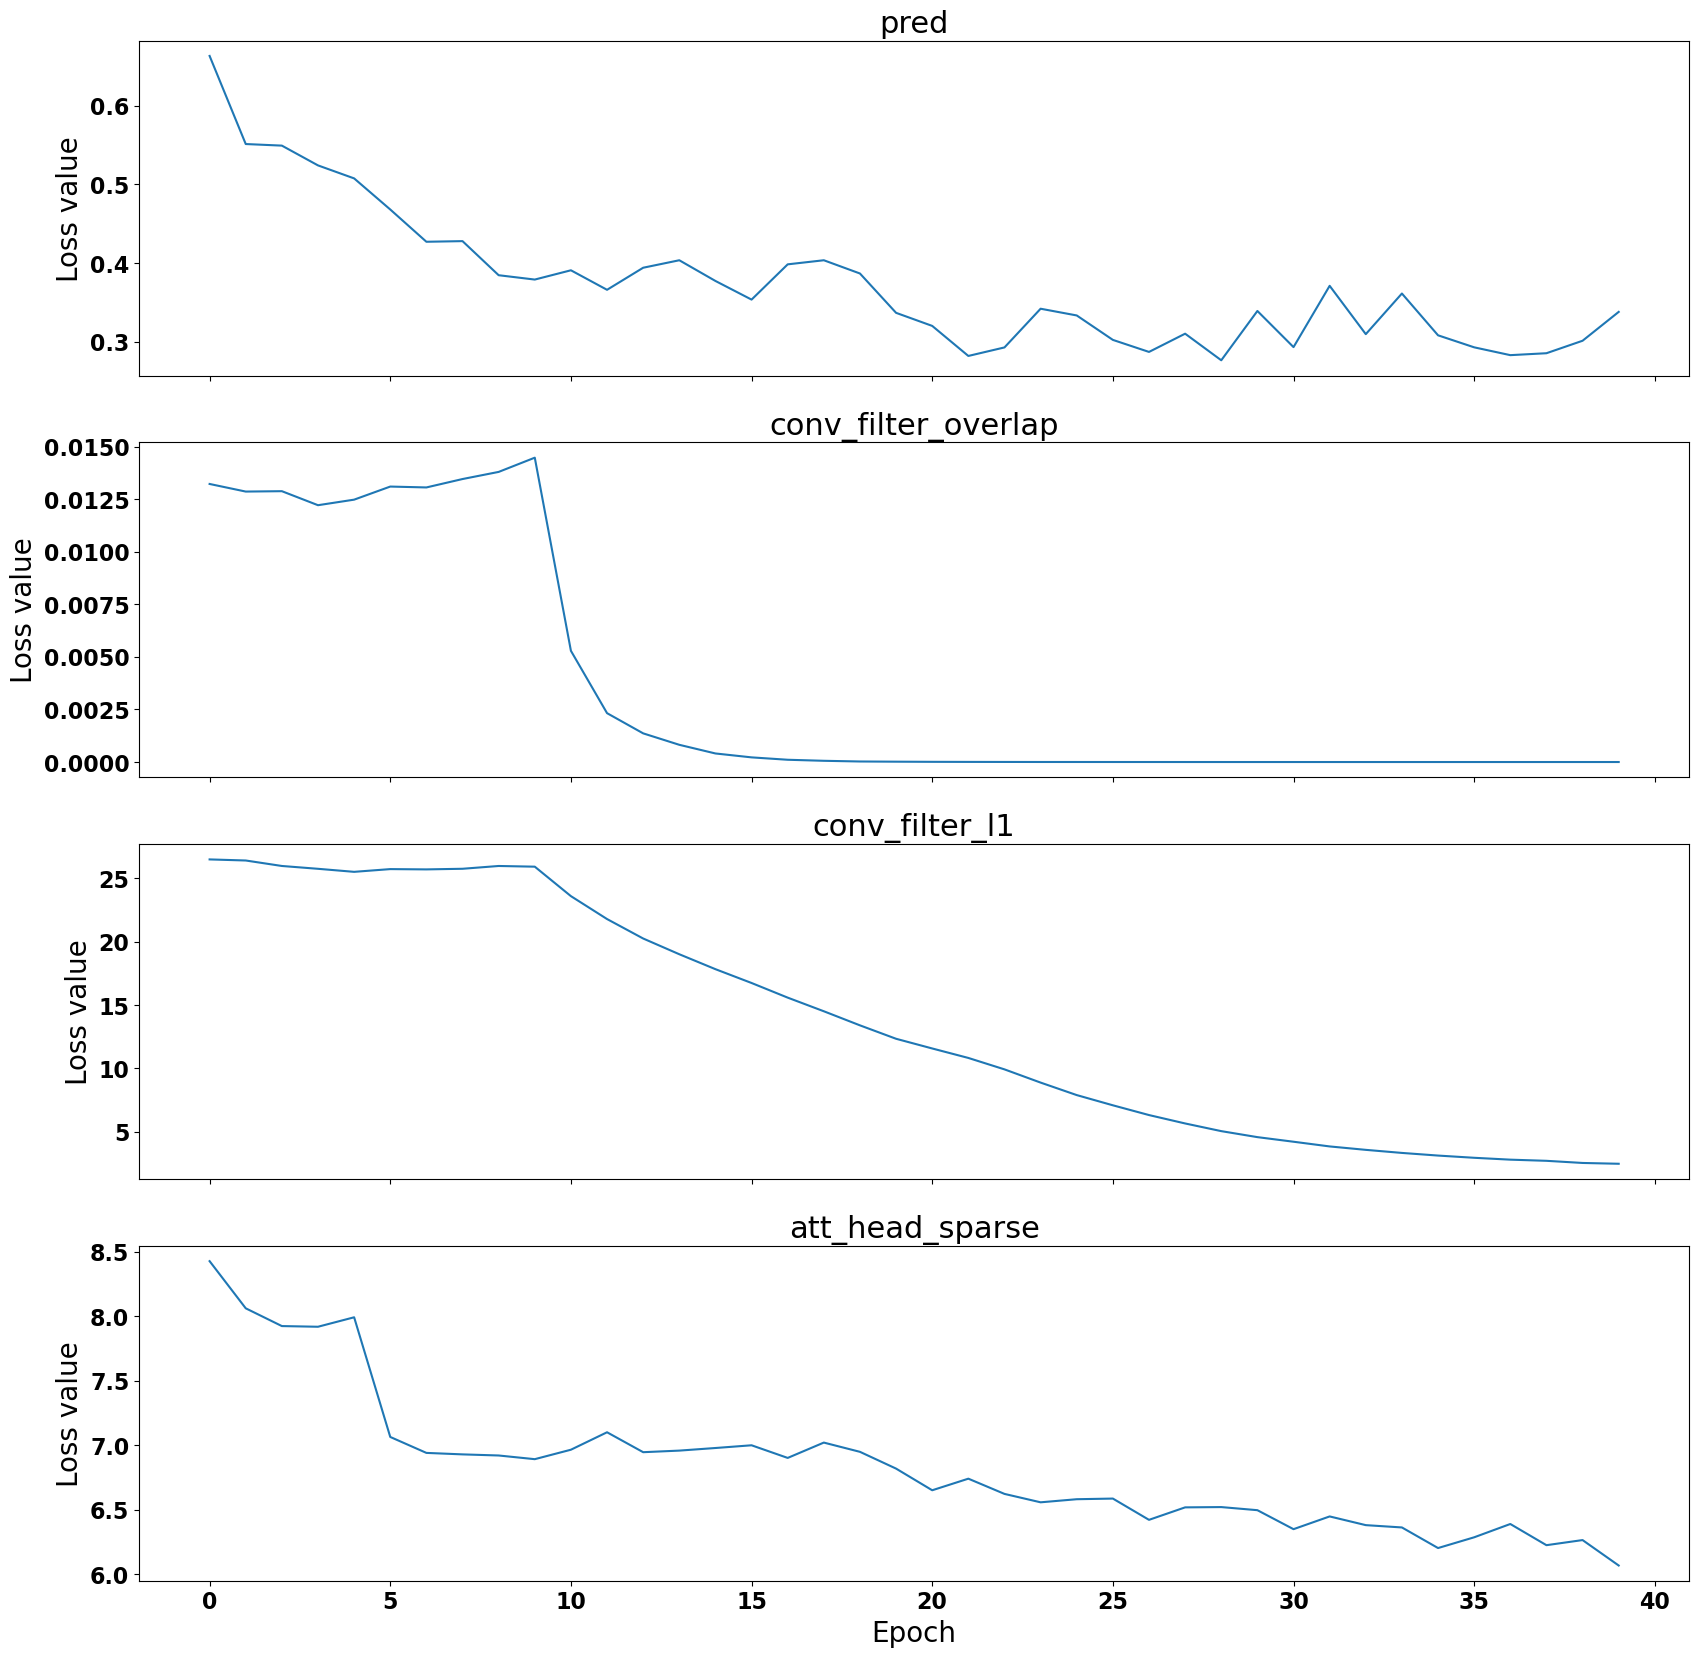

In [24]:
loss_comps = ["pred", "conv_filter_overlap", "conv_filter_l1", "att_head_sparse"]
loss_comp_vals = {
    loss_comp : metrics["val_epoch_loss_" + loss_comp]["values"] for loss_comp in loss_comps
}

fig, ax = plt.subplots(nrows=len(loss_comps), sharex=True, figsize=(20, 5 * len(loss_comps)))
for i, loss_comp in enumerate(loss_comps):
    vals = loss_comp_vals[loss_comp]
    ax[i].plot(np.arange(len(vals)), vals)
    ax[i].set_title(loss_comp)
    ax[i].set_ylabel("Loss value")
ax[-1].set_xlabel("Epoch")
plt.show()

### Import model and create data loader

In [25]:
model = model_util.load_model(
    mechint_net.MechIntRegNet, model_path
).to(DEVICE)

In [26]:
data_loader = simulated_dataset.dataset_ex.run(
    "create_data_loader", config_updates={
        "motif_config_path": motif_config_path,
        "input_length": 500,
        "motif_center_dist_bound": 50,
        "batch_size": 128,
        "num_batches": 1,
        "background_match_reject_prob": 1,
        "neg_motif_config_path": neg_motif_config_path
    }
).result

WARNING - root - Added new config entry: "motif_config_path"
WARNING - root - Added new config entry: "neg_motif_config_path"
WARNING - sim_dataset - No observers have been added to this run
INFO - sim_dataset - Running command 'create_data_loader'
INFO - sim_dataset - Started
/home/tsenga5/miniforge3/envs/grelu/lib/python3.12/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO - sim_dataset - Result: <torch.utils.data.dataloader.DataLoader object at 0x14fa107726c0>
INFO - sim_dataset - Completed after 0:00:00


### Run predictions

In [27]:
losses_batched, losses, model_outputs, losses_comps, model_outputs_other, input_data = \
    train_model.run_epoch(data_loader, "eval", model, epoch_num=0, return_extras=True)

	Loss: 0.3070: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.65s/it]


In [28]:
true_labels, pred_probs = np.squeeze(input_data[1], axis=1), np.squeeze(model_outputs, axis=1)

In [29]:
for key, val in losses_comps.items():
    print("%s: %6.4f" % (key, np.mean(val)))

conv_filter_overlap: 0.0000
conv_filter_l1: 2.4610
att_head_sparse: 6.0803
pred: 0.3070


In [30]:
conv_acts = model_outputs_other["conv_acts"]  # Shape: N x L' x F
att_vals = model_outputs_other["att_vals"]  # Shape: N x AL x NH x L'

In [31]:
# Extract convolutional filter weights
conv_weights = model.conv_layer.weight.detach().cpu().numpy()  # Shape: F x 4 x W

### Compute performance metrics

In [32]:
metrics = performance.compute_performance_metrics(true_labels, pred_probs)
max_key_len = max(len(k) for k in metrics.keys())
for key, val in metrics.items():
    print("%s: %6.4f" % (key.ljust(max_key_len), val))

acc    : 0.8828
pos_acc: 0.9219
neg_acc: 0.8438
auroc  : 0.9399
precis : 0.8551
recall : 0.9219
auprc  : 0.9114


### Visualize convolutional filter weights

In [33]:
def create_dna_logo(matrix, ax=None):
    """
    Creates a DNA logo using the logomaker package.
    Arguments:
        `matrix`: an L x 4 array of values to plot, in ACGT order
        `ax`: Axes object on which to plot
    Returns the resulting Logo object.
    """
    data = pd.DataFrame(matrix, columns=["A", "C", "G", "T"])
    logo = logomaker.Logo(data, ax=ax)
    return logo

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

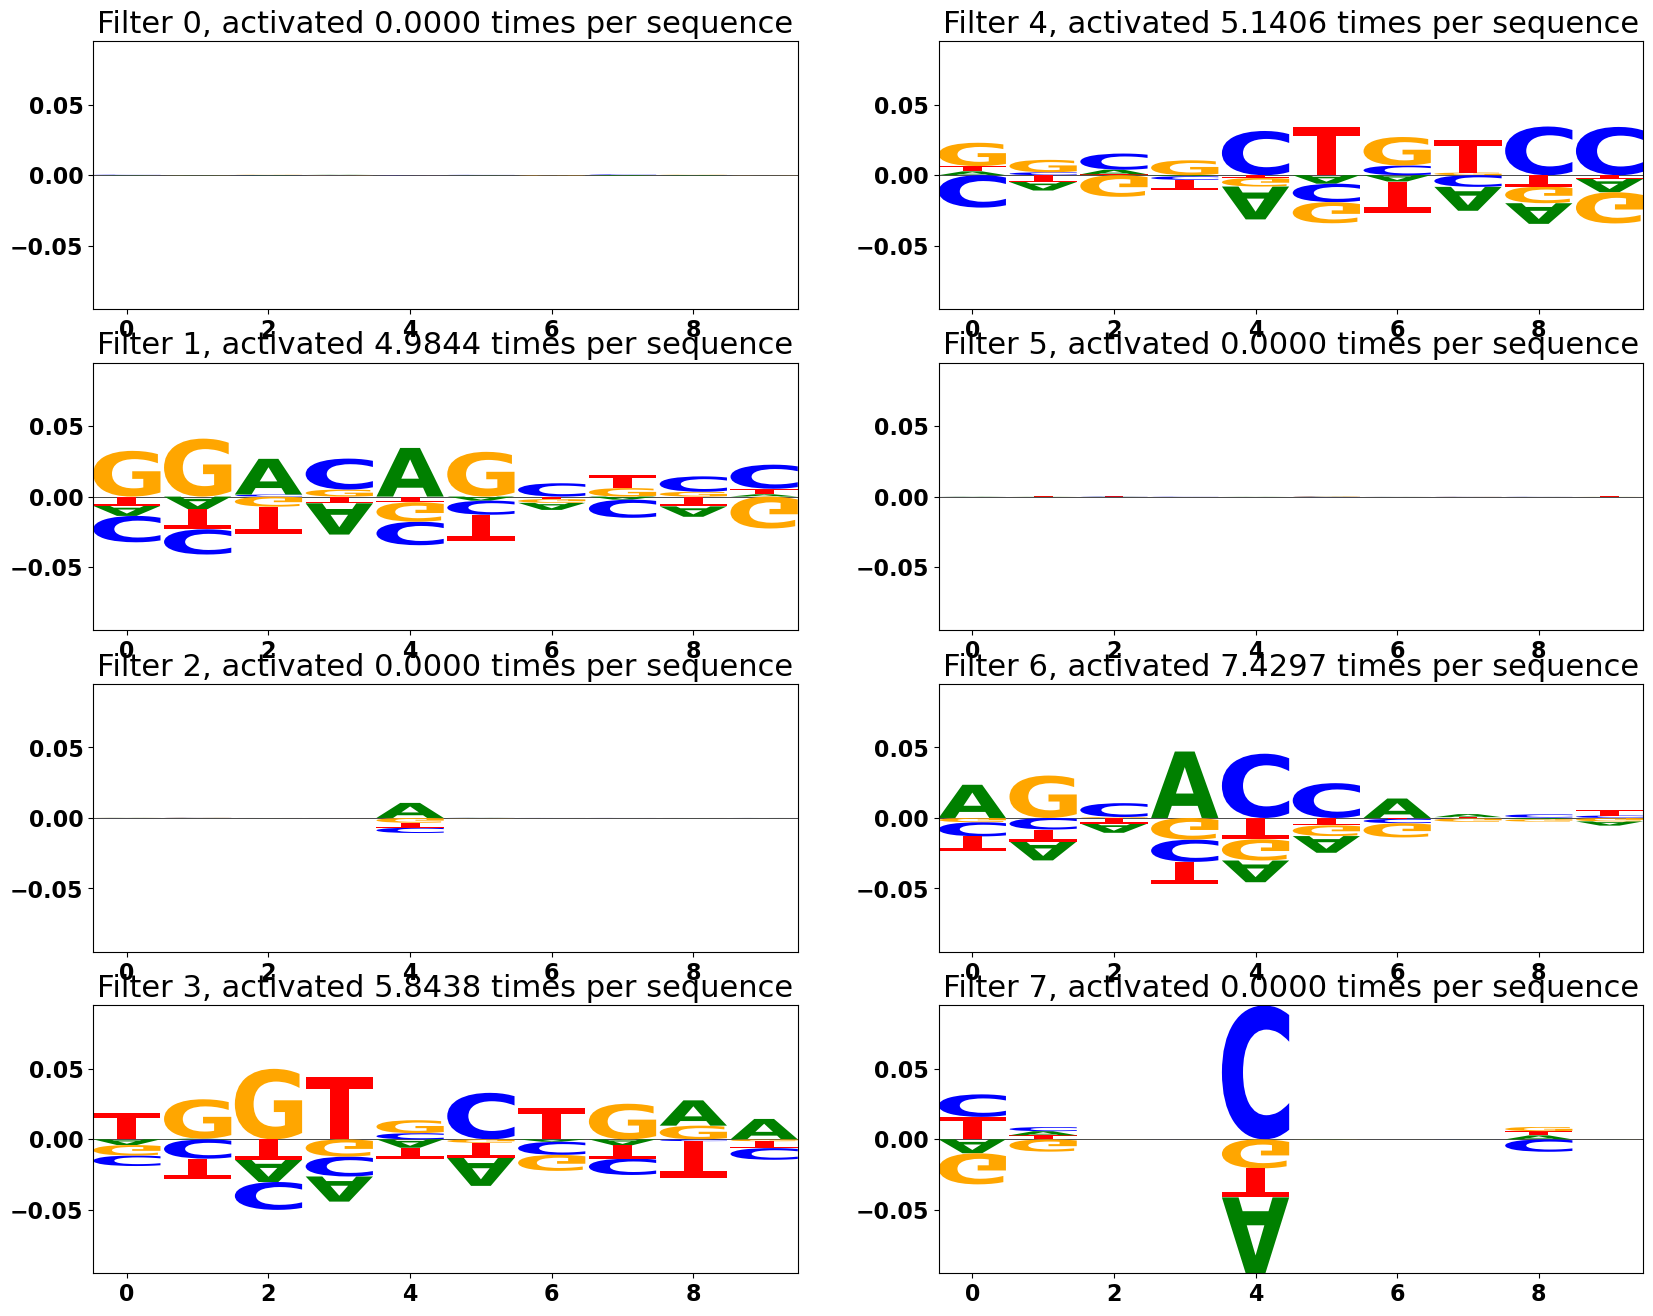

In [34]:
average_act_counts = np.mean(np.sum(conv_acts > 0, axis=1), axis=0)
num_cols = 2
num_rows = int(np.ceil(len(conv_weights) / 2))
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
if len(ax.shape) == 1:
    ax = ax[None]

# Mean-center
conv_weights_centered = conv_weights - np.mean(conv_weights, axis=1, keepdims=True)

min_height = np.min(np.sum(np.minimum(conv_weights_centered, 0), axis=1))
max_height = np.max(np.sum(np.maximum(conv_weights_centered, 0), axis=1))
ylims = (min_height, max_height)
for filter_i in range(conv_weights.shape[0]):
    i, j = filter_i % num_rows, filter_i // num_rows
    
    weights = np.transpose(conv_weights_centered[filter_i])
    
    create_dna_logo(weights, ax=ax[i, j])
    ax[i, j].set_ylim(ylims)
    ax[i, j].set_title("Filter %d, activated %.4f times per sequence" % (filter_i, average_act_counts[filter_i]))
plt.show()

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

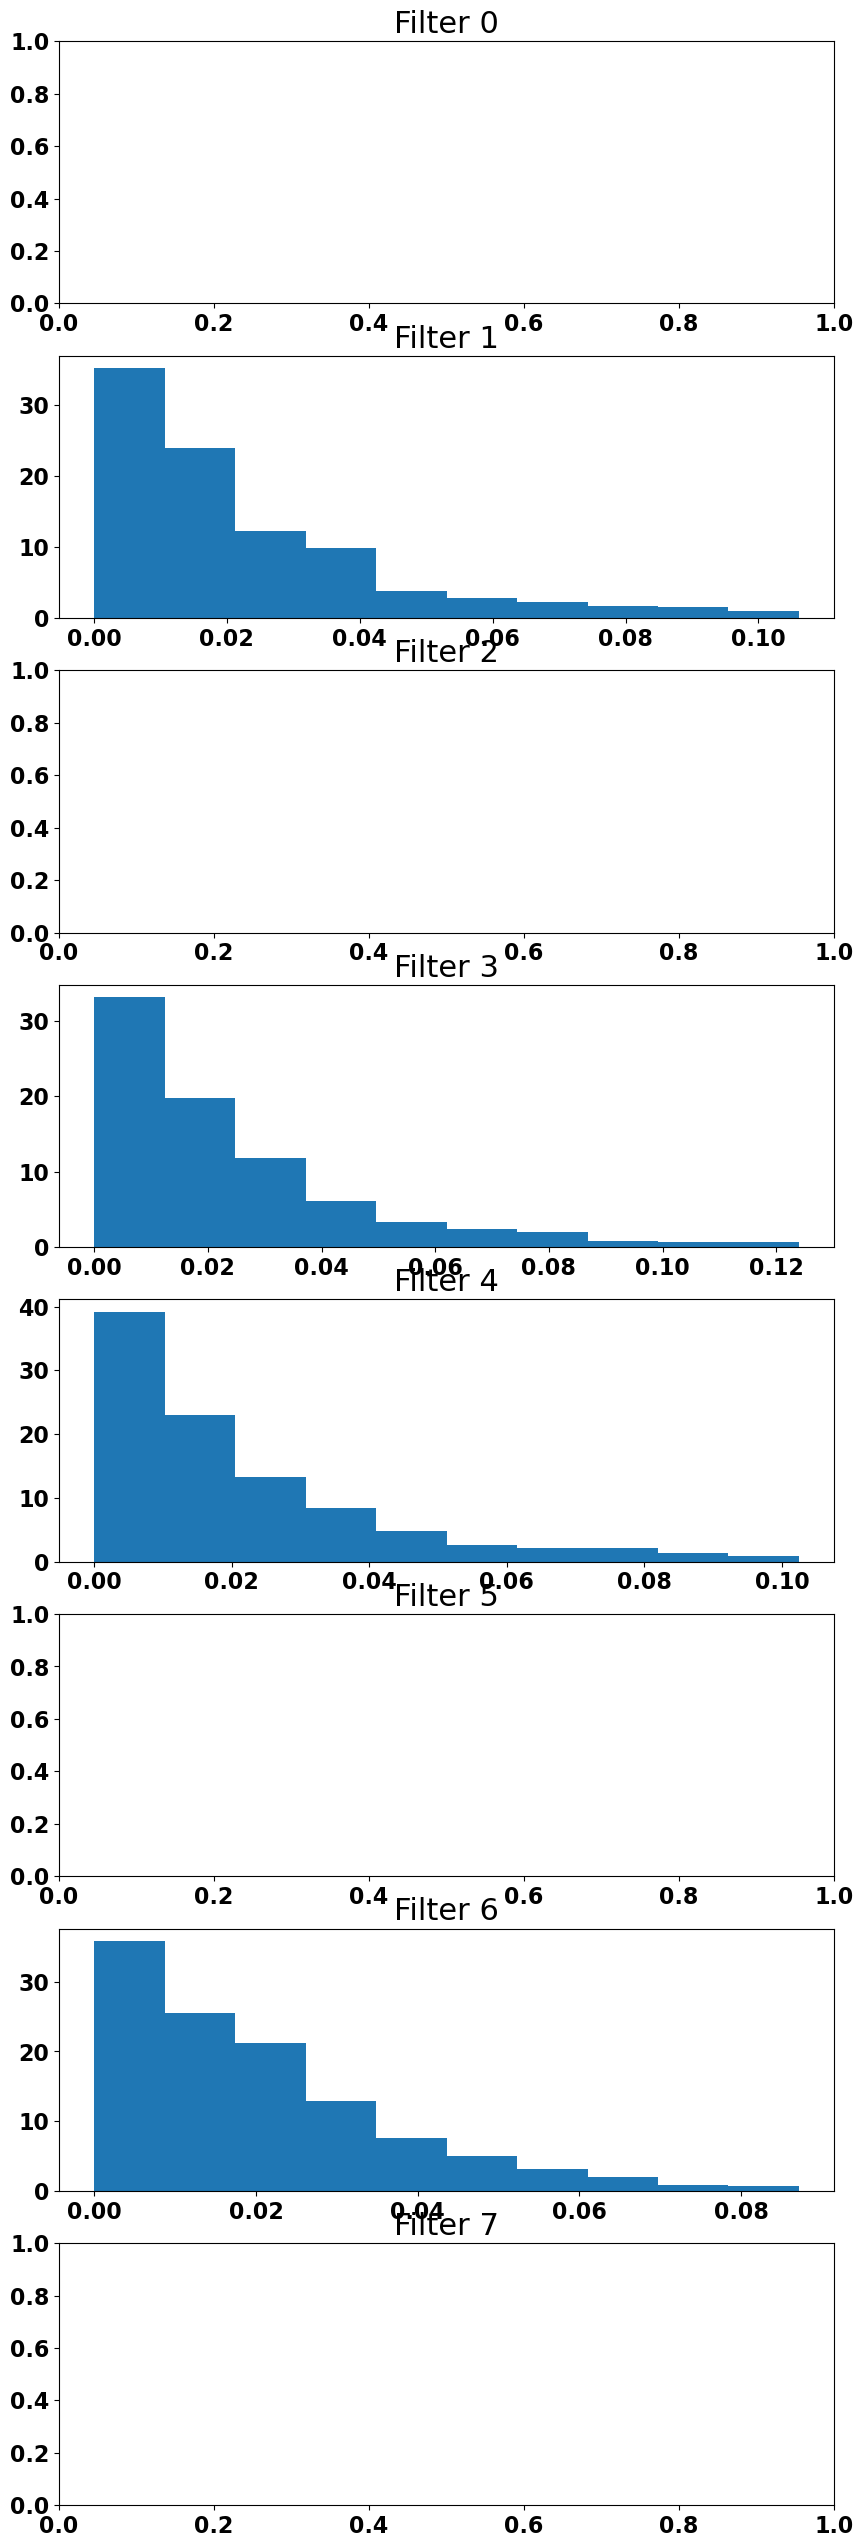

In [35]:
# Distribution of convolutional activations (ignoring zeros)
num_filters = conv_acts.shape[2]
fig, ax = plt.subplots(nrows=num_filters, figsize=(10, 4 * num_filters))
for filter_i in range(num_filters):
    acts = np.ravel(conv_acts[:, :, filter_i])
    acts = acts[acts > 0]
    if acts.size:
        ax[filter_i].hist(acts, density=True)
    ax[filter_i].set_title("Filter %d" % filter_i)
plt.show()

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

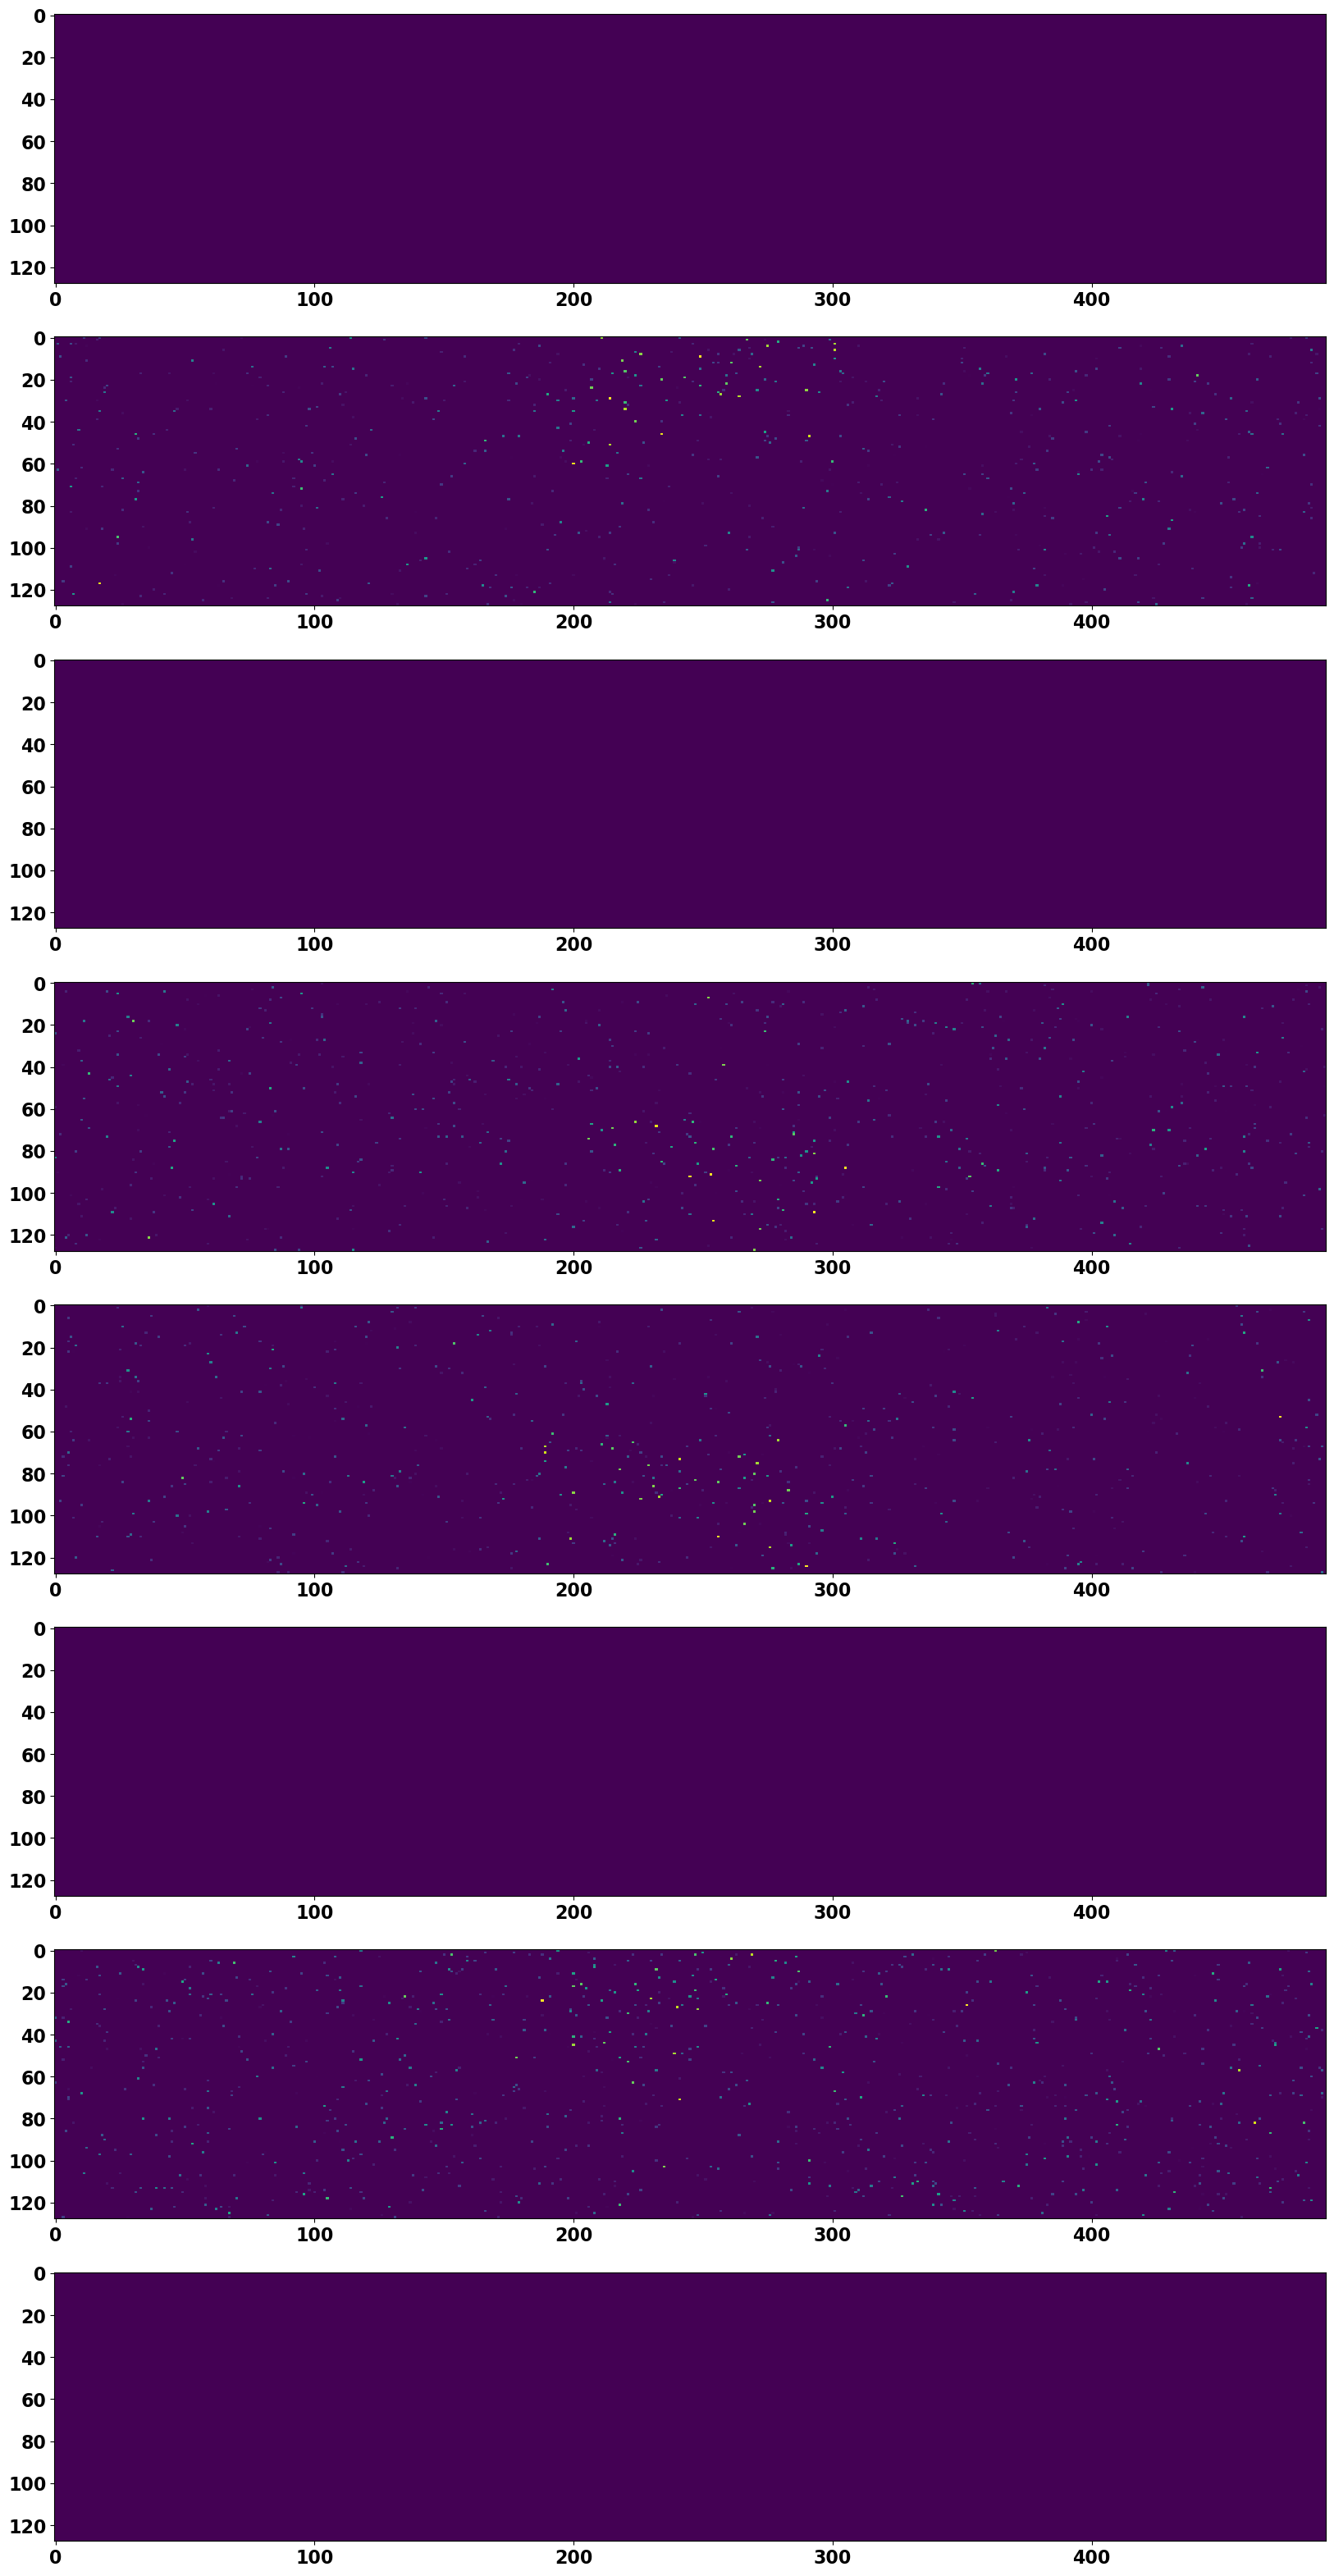

In [36]:
# Location of where motifs light up
num_filters = conv_acts.shape[2]
fig, ax = plt.subplots(nrows=num_filters, figsize=(20, 5 * num_filters))
for filter_i in range(num_filters):
    ax[filter_i].imshow(conv_acts[:, :, filter_i], interpolation="nearest", aspect="auto")
plt.show()

### Visualize distribution of attention values

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

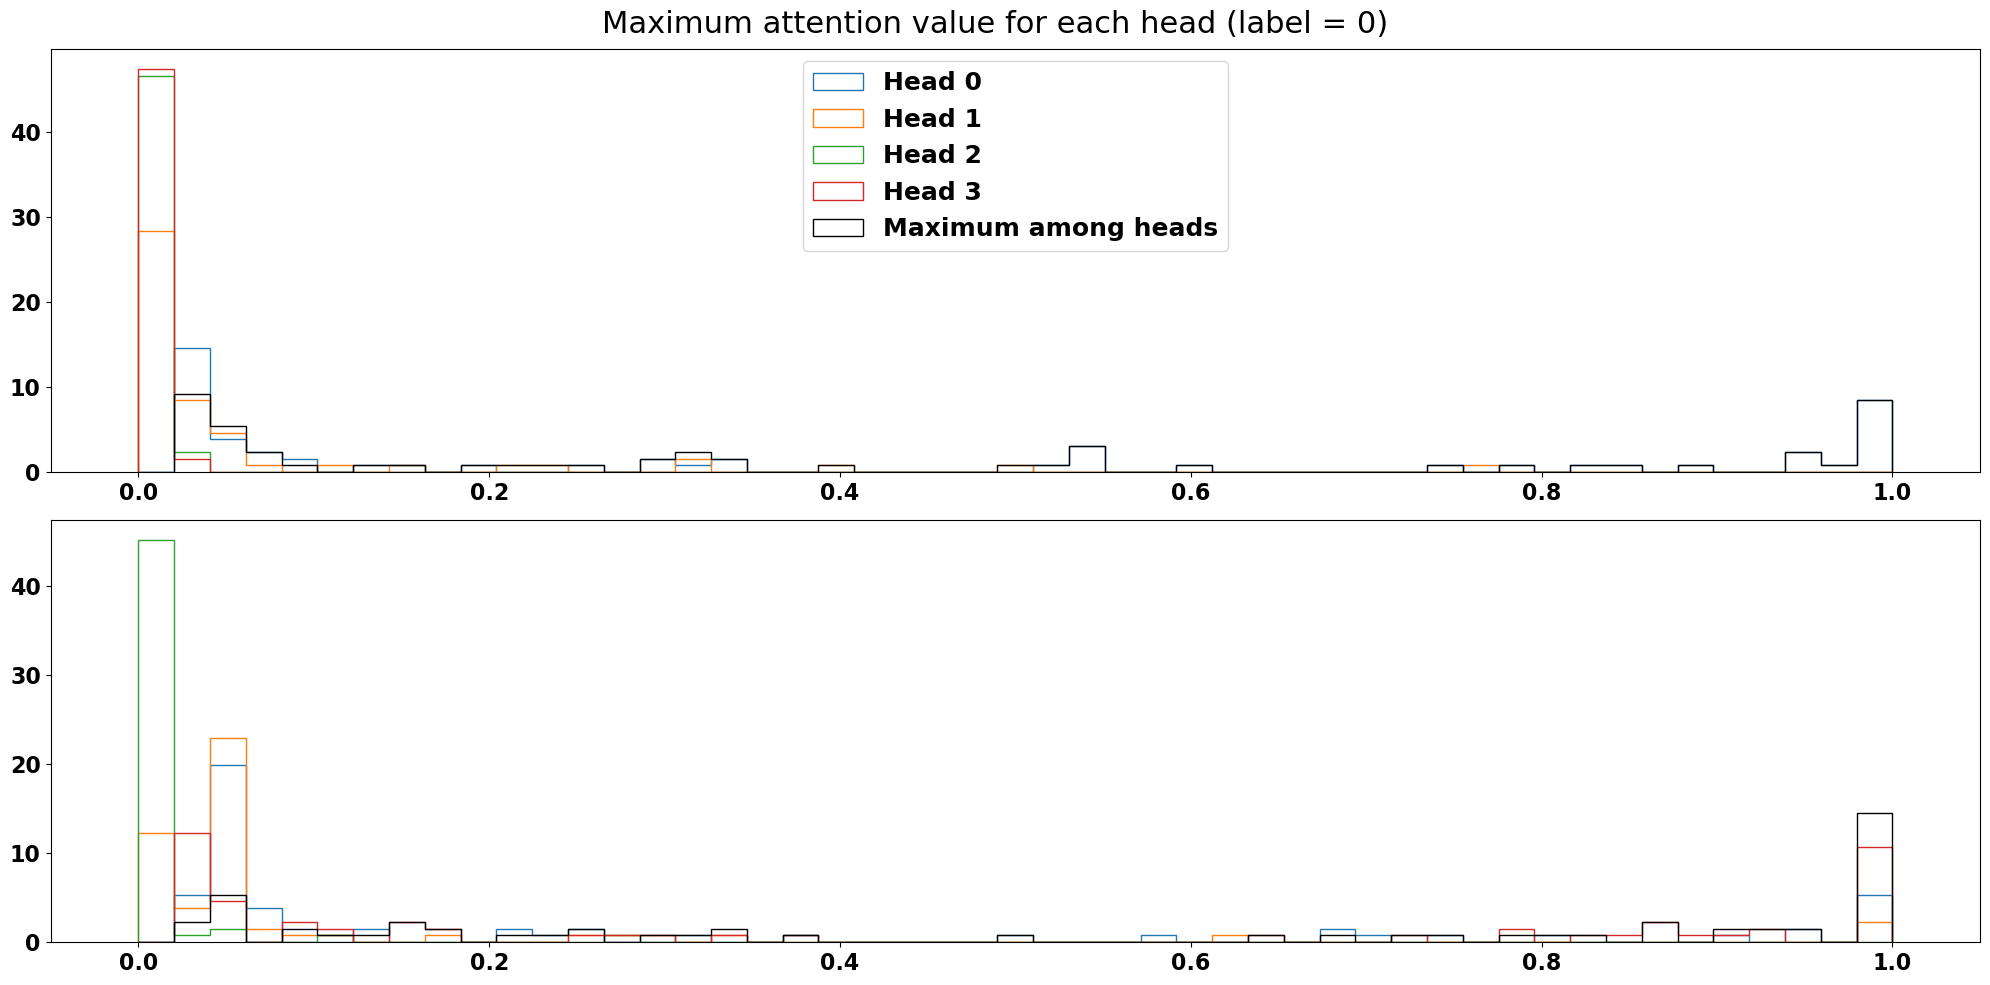

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

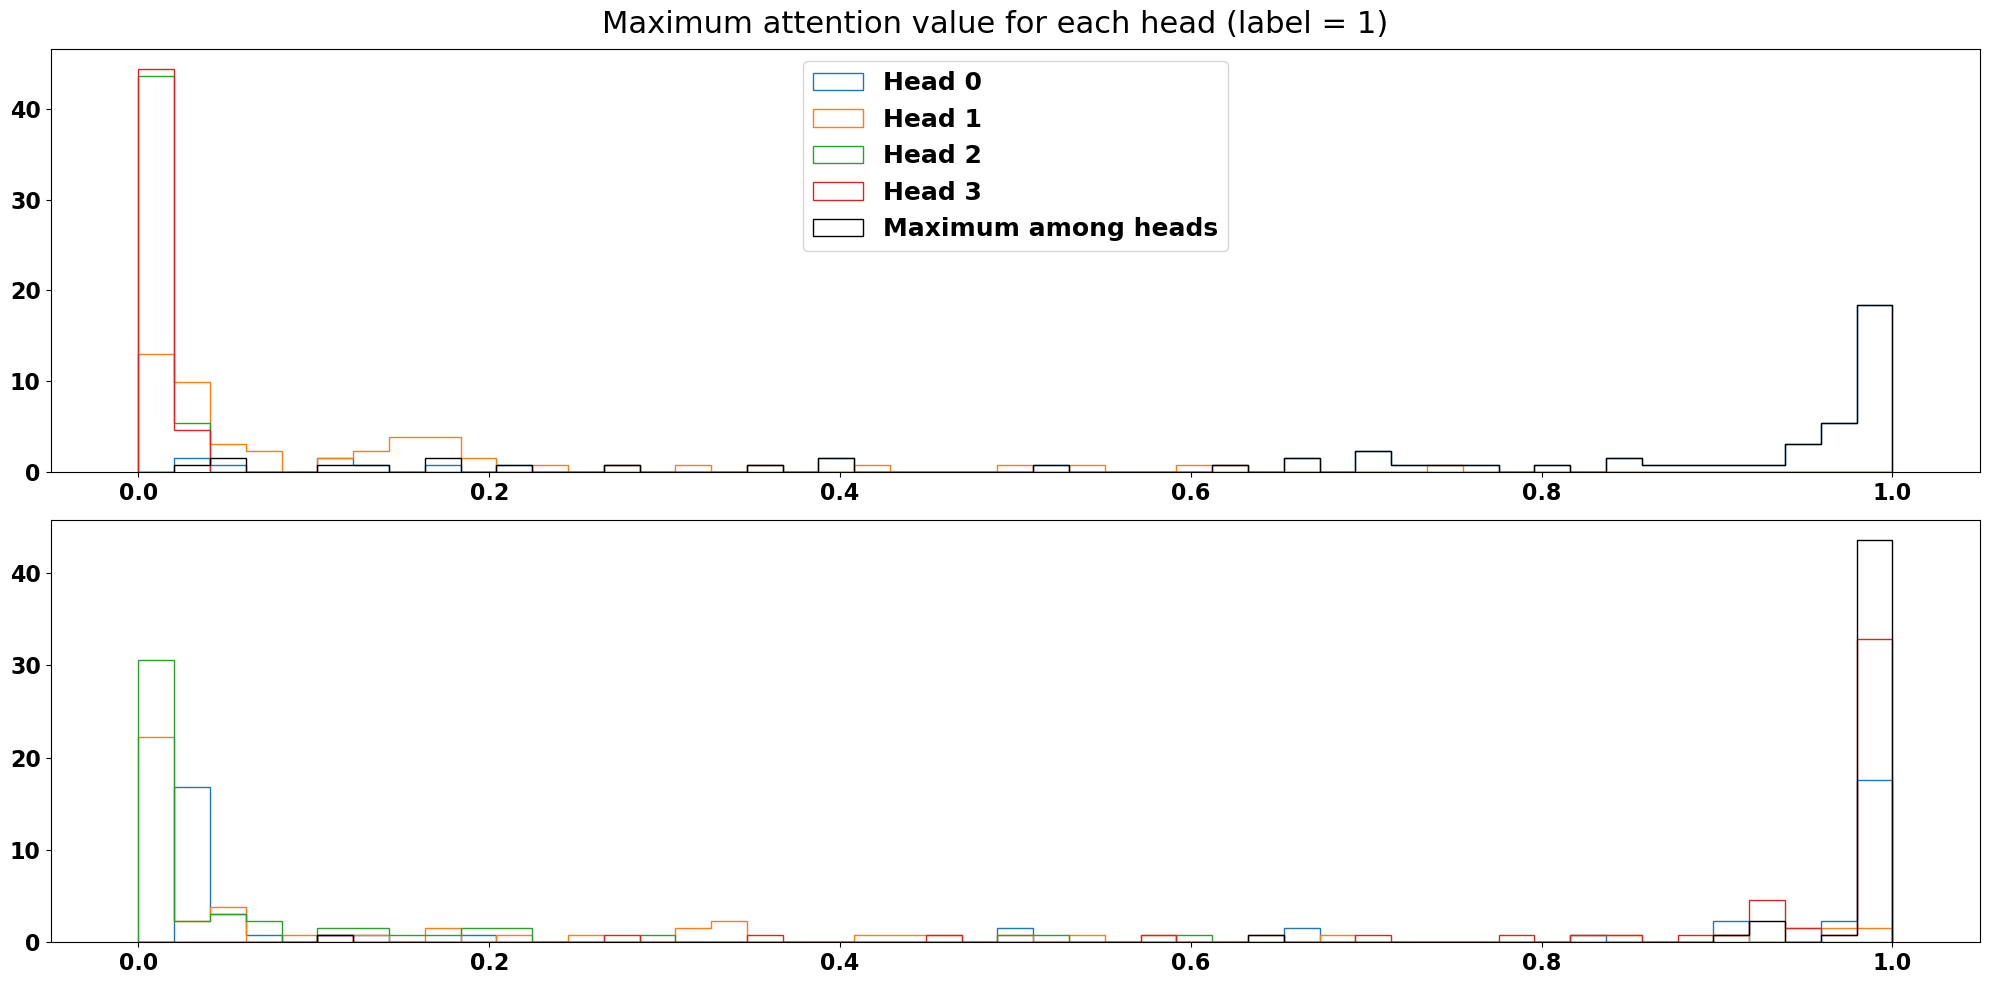

In [37]:
# Maximum attention values on positives and negatives
for label in (0, 1):
    label_inds = true_labels == label
    label_spec_att_vals = att_vals[label_inds]

    num_att_layers, att_num_heads = label_spec_att_vals.shape[1], label_spec_att_vals.shape[2]
    fig, ax = plt.subplots(nrows=num_att_layers, figsize=(20, 5 * num_att_layers))
    if num_att_layers == 1:
        ax = [ax]
    bins = np.linspace(0, 1, 50)
    for layer_i in range(num_att_layers):
        for head_i in range(att_num_heads):
            max_att_vals = np.max(label_spec_att_vals[:, layer_i, head_i], axis=1)
            ax[layer_i].hist(max_att_vals, bins=bins, histtype="step", density=True, label=("Head %d" % head_i))
        max_att_vals_all_heads = np.max(label_spec_att_vals[:, layer_i], axis=(1, 2))
        ax[layer_i].hist(max_att_vals_all_heads, bins=bins, histtype="step", color="black", density=True, label="Maximum among heads")
    ax[0].legend(loc="upper center")
    fig.suptitle("Maximum attention value for each head (label = %d)" % label)
    fig.tight_layout()
    plt.show()

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

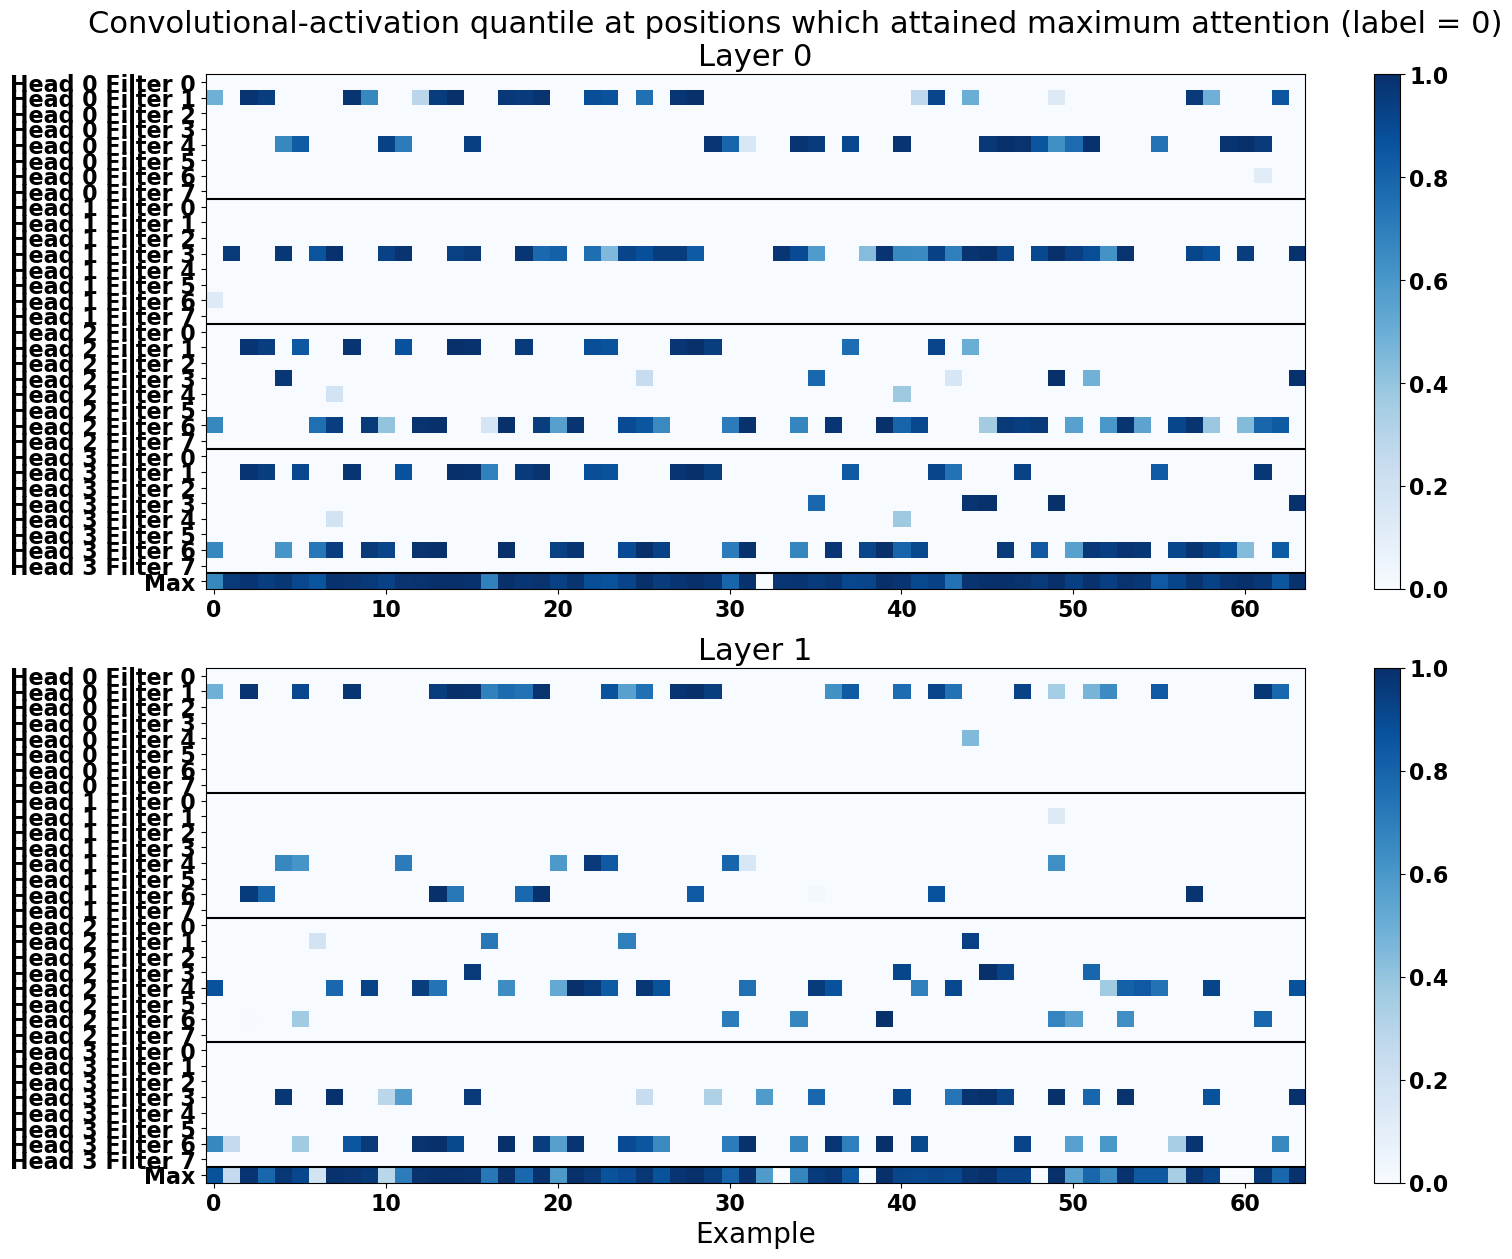

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

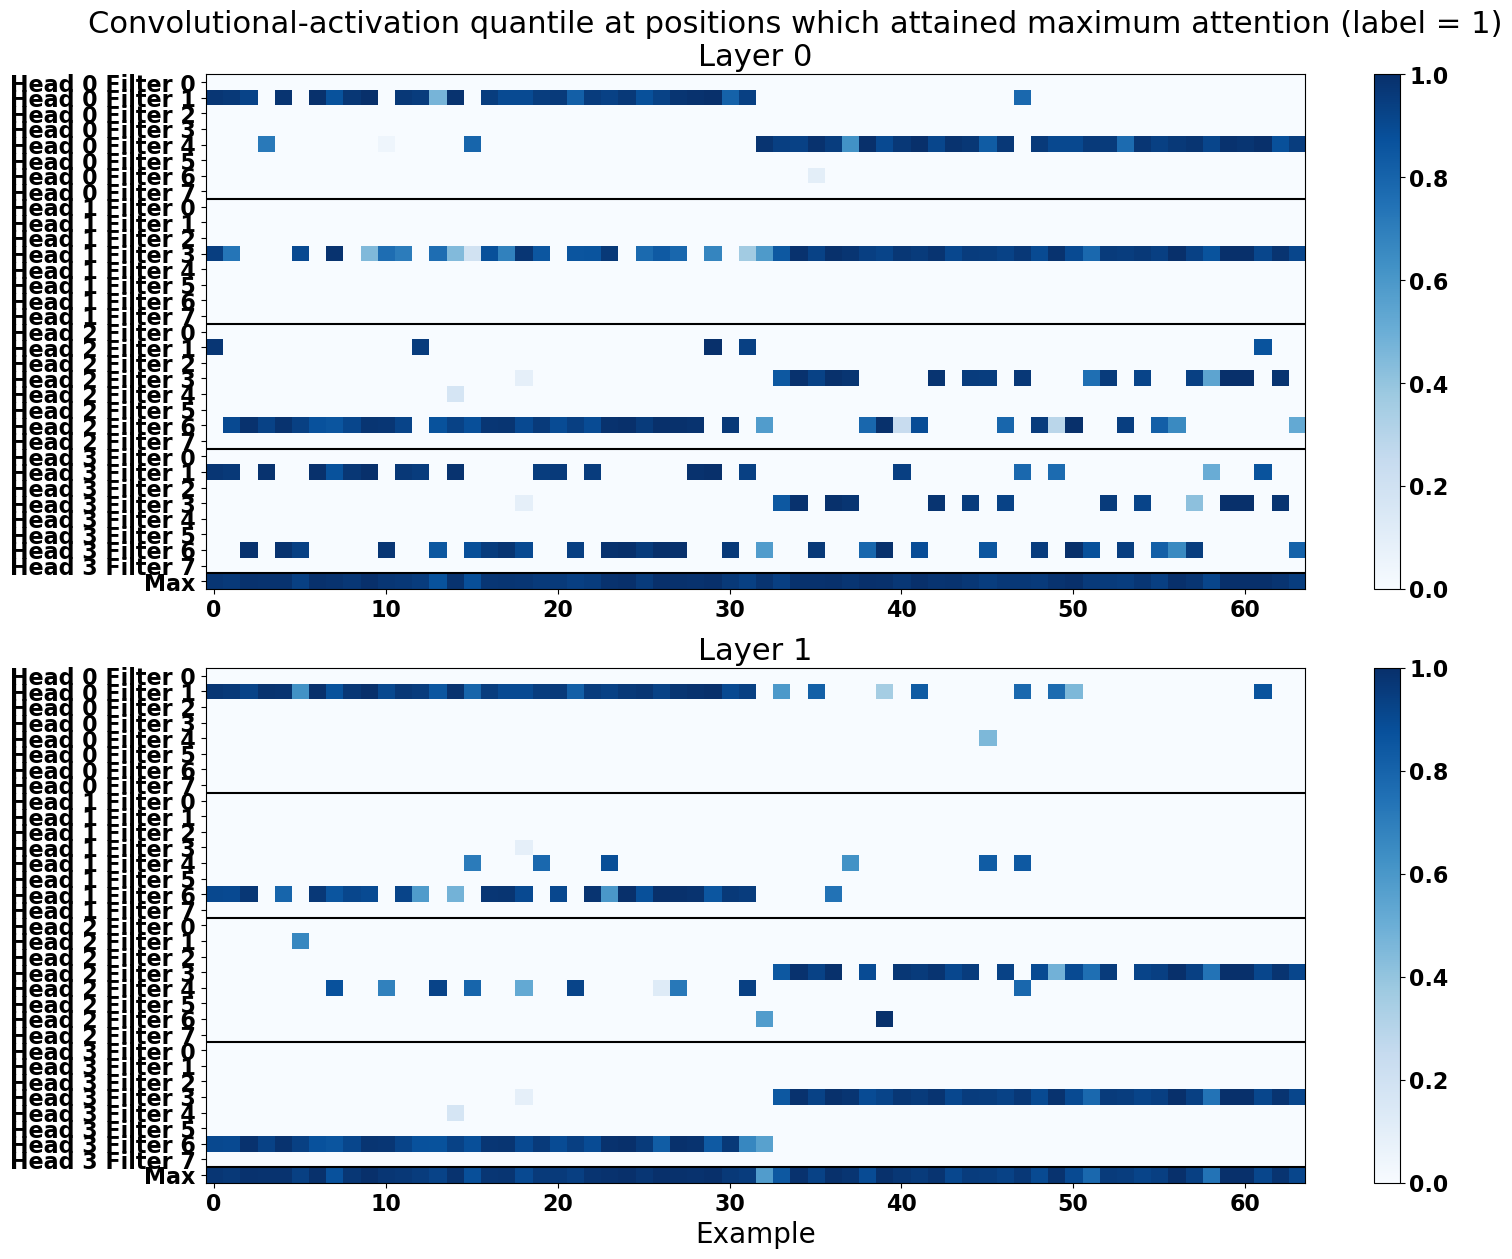

In [38]:
# For maximum attention values, show associated maximum activations
for label in (0, 1):
    label_inds = true_labels == label
    label_att_vals = att_vals[label_inds]
    label_conv_acts = conv_acts[label_inds]

    num_att_layers, att_num_heads = label_att_vals.shape[1], label_att_vals.shape[2]
    num_filters = label_conv_acts.shape[2]

    # First, obtain non-zero distribution of each filter's activations (sorted)
    conv_act_dists = []
    for filter_i in range(num_filters):
        acts = label_conv_acts[:, :, filter_i]
        acts = acts[acts > 0]
        conv_act_dists.append(None if not acts.size else np.sort(acts))

    fig, ax = plt.subplots(nrows=num_att_layers, figsize=(label_att_vals.shape[0] * 0.25, num_att_layers * att_num_heads * num_filters * 0.2))
    if num_att_layers == 1:
        ax = [ax]
    for layer_i in range(num_att_layers):
        max_act_quants = np.zeros((label_att_vals.shape[0], (att_num_heads * num_filters) + 1))
        for head_i in range(att_num_heads):
            # For each head in each layer...
            # Get position of maximum attention value for each input
            max_att_val_inds = np.argmax(label_att_vals[:, layer_i, head_i], axis=1)  # Shape: B
            # Get the filter activations for the max-attention-value locations
            max_att_acts = label_conv_acts[np.arange(len(max_att_val_inds)), max_att_val_inds]  # Shape: B x F
            for filter_i in range(num_filters):
                if conv_act_dists[filter_i] is None:
                    continue
                # For each filter, get the quantile of the activation at the given indices (for all inputs)
                max_act_quants[:, (head_i * num_filters) + filter_i] = np.searchsorted(
                    conv_act_dists[filter_i], max_att_acts[:, filter_i], side="right"
                ) / len(conv_act_dists[filter_i])

        # Compute the maximum for each column
        max_act_quants[:, -1] = np.max(max_act_quants[:, :-1], axis=1)

        ax[layer_i].imshow(np.transpose(max_act_quants), interpolation="nearest", aspect="auto", cmap="Blues")
        ax[layer_i].set_yticks(np.arange(max_act_quants.shape[1]))
        ax[layer_i].set_yticklabels([
            ("Head %d Filter %d" % (i, j)) for i in range(att_num_heads) for j in range(num_filters)
        ] + ["Max"])
        for i in range(att_num_heads):
            ax[layer_i].axhline(((i + 1) * num_filters) - 0.5, color="black")
        fig.colorbar(plt.cm.ScalarMappable(cmap="Blues"), ax=ax[layer_i])
        ax[layer_i].set_title("Layer %d" % layer_i)

    ax[-1].set_xlabel("Example")
    fig.suptitle("Convolutional-activation quantile at positions which attained maximum attention (label = %d)" % label)
    fig.tight_layout()
    plt.show()

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

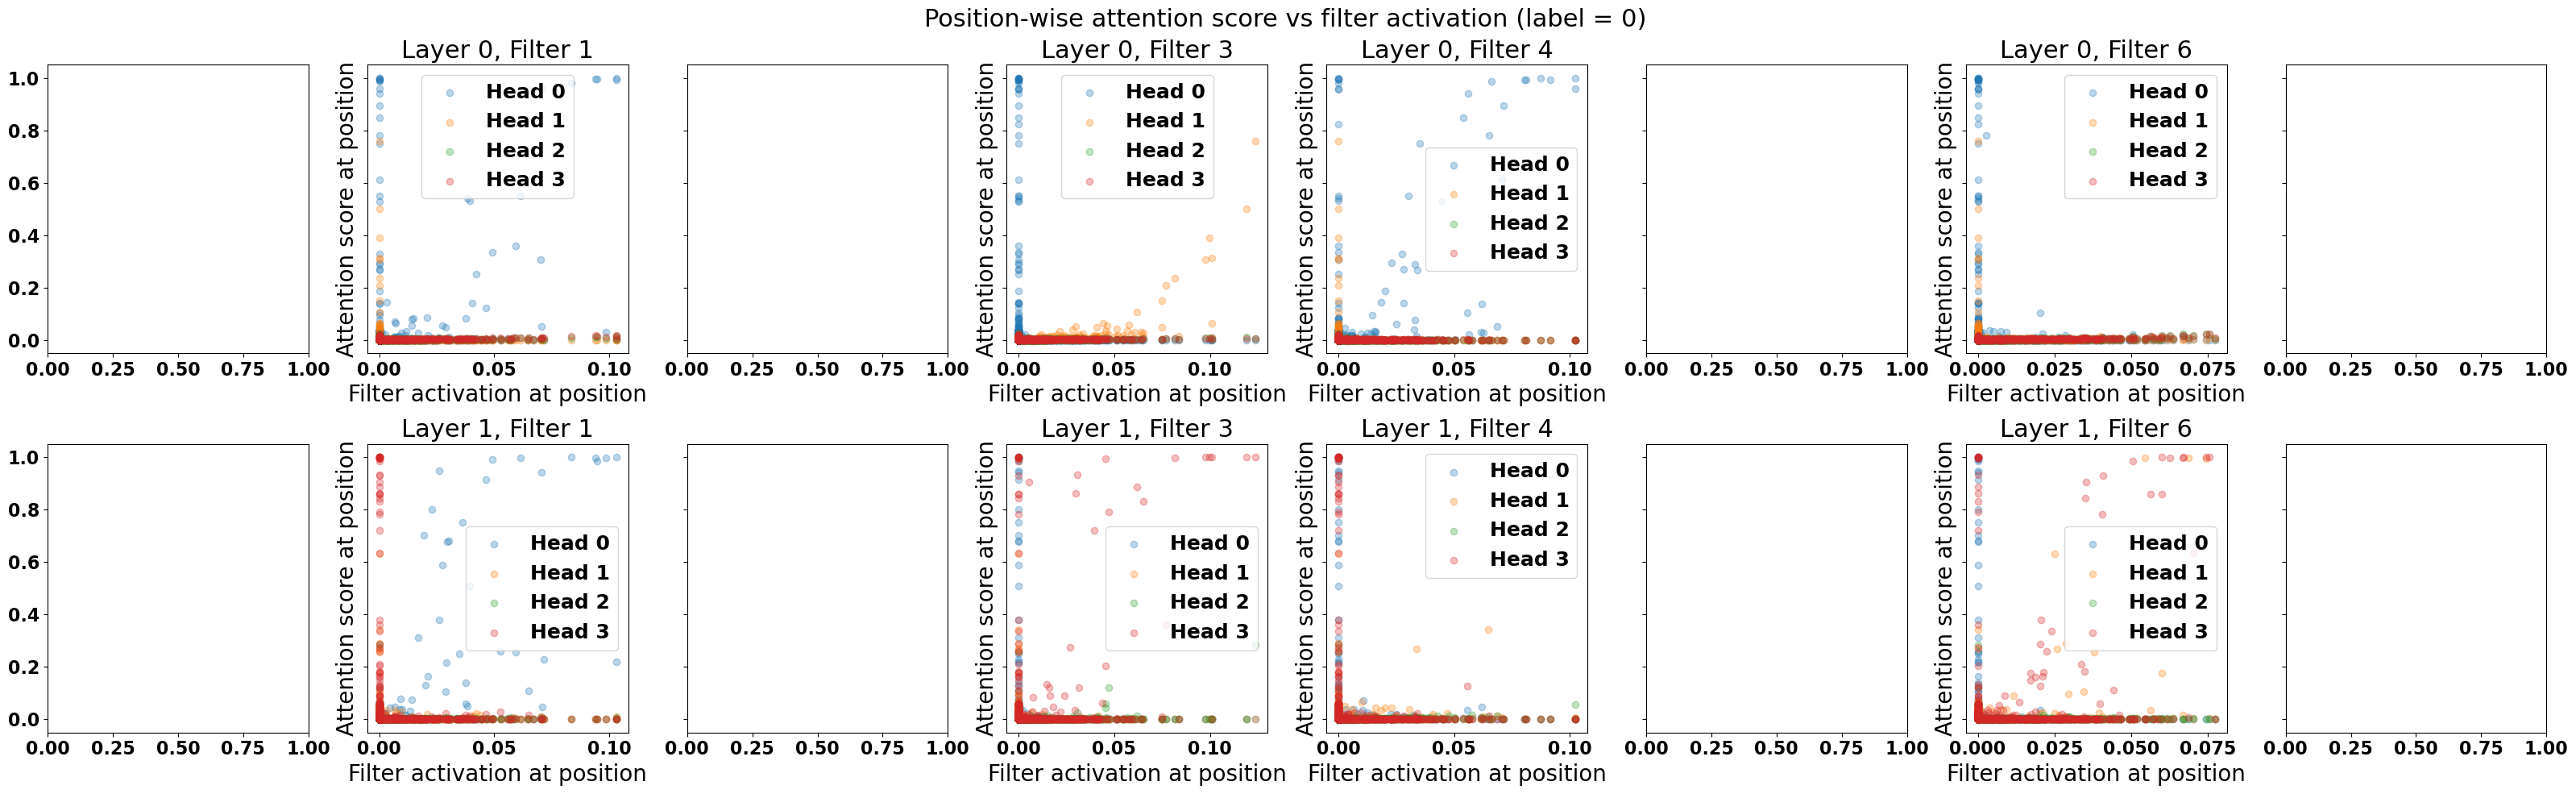

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

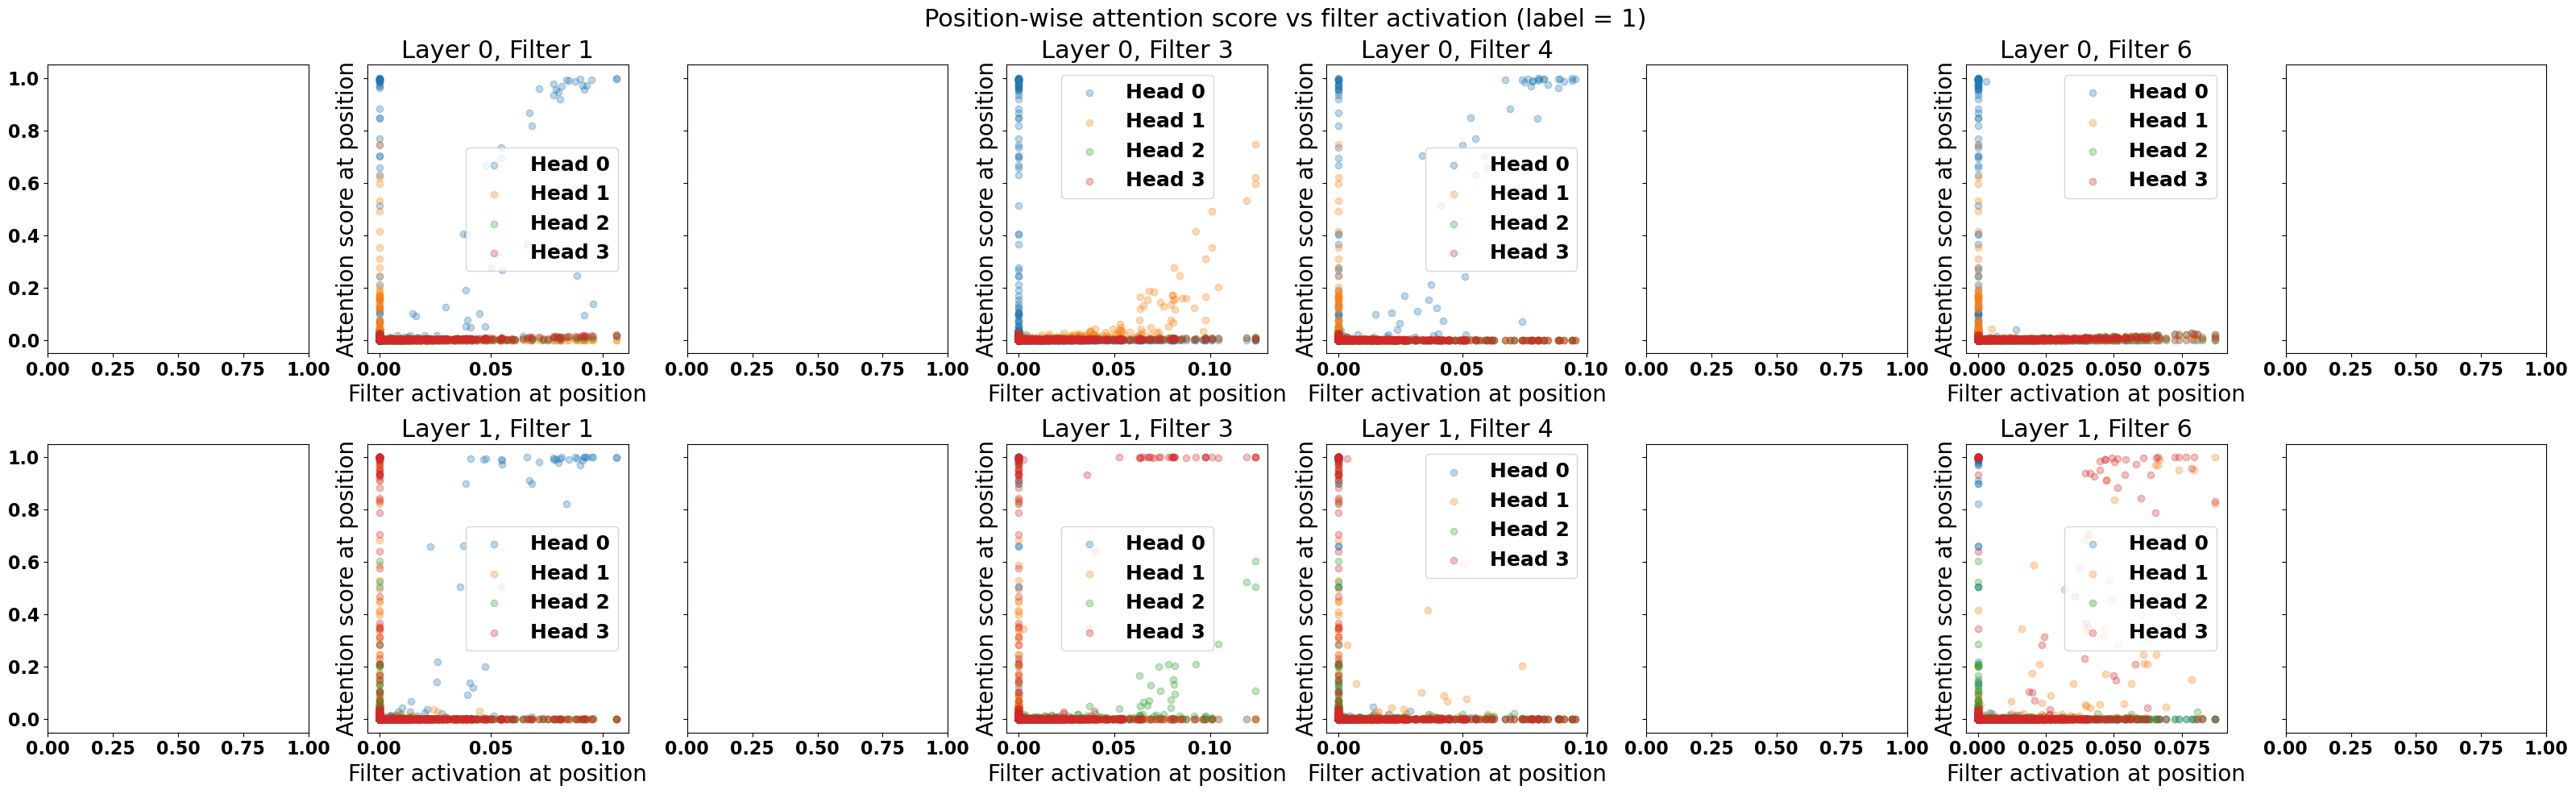

In [39]:
# For each filter, show the relationship between activations and attention scores
for label in (0, 1):
    label_inds = true_labels == label
    label_att_vals = att_vals[label_inds]
    label_conv_acts = conv_acts[label_inds]

    num_att_layers, att_num_heads = label_att_vals.shape[1], label_att_vals.shape[2]
    num_filters = label_conv_acts.shape[2]

    fig, ax = plt.subplots(
        nrows=num_att_layers, ncols=num_filters, sharey=True, figsize=(num_filters * 4, num_att_layers * 5)
    )
    if num_att_layers == 1:
        ax = np.array([ax])
    for layer_i in range(num_att_layers):
        # For each layer...
        for filter_i in range(num_filters):
            # Get the activations across all examples, across all positions
            filter_acts = label_conv_acts[:, :, filter_i]  # Shape: B x L'
            if not filter_acts[filter_acts > 0].size:
                # Skip if the filter never activates
                continue
            for head_i in range(att_num_heads):
                # Get the attention scores across all examples and positions for that layer/head
                filter_att_vals = label_att_vals[:, layer_i, head_i]  # Shape: B x L'
                
                ax[layer_i, filter_i].scatter(
                    np.ravel(filter_acts), np.ravel(filter_att_vals), alpha=0.3, label=("Head %d" % head_i)
                )
            
            ax[layer_i, filter_i].set_ylabel("Attention score at position")
            ax[layer_i, filter_i].set_xlabel("Filter activation at position")
            ax[layer_i, filter_i].set_title("Layer %d, Filter %d" % (layer_i, filter_i))
            ax[layer_i, filter_i].legend()
        
    fig.suptitle("Position-wise attention score vs filter activation (label = %d)" % label)
    fig.tight_layout()
    plt.show()

### Extract motif instances and global rules

In [40]:
# For each positive example, find the maximum attention values and map them to motifs (and their positions)
pos_att_vals = att_vals[true_labels == 1]
pos_conv_acts = conv_acts[true_labels == 1]

motif_hits = []

# For each filter, get a distribution activations
filter_mean_acts = np.empty(pos_conv_acts.shape[2])
for filter_i in range(pos_conv_acts.shape[2]):
    acts = pos_conv_acts[:, :, filter_i]
    acts = acts[acts > 0]  # Only positive activations
    filter_mean_acts[filter_i] = np.mean(acts)

# For each example, get the positions which had a high attention score
for ex_i in range(len(pos_att_vals)):
    att_scores = pos_att_vals[ex_i]  # Shape: AL x AH x L'

    # Get positions with high attention score
    mask = np.any(att_scores > 0.5, axis=(0, 1))  # Collapse over attention layers and heads
    inds = np.where(mask)[0]

    ex_motif_hits = []

    # For each position, figure out which motif is firing
    for hit_pos in inds:
        acts = pos_conv_acts[ex_i, hit_pos]
        filter_hits = acts > filter_mean_acts
        if not np.any(filter_hits):
            # Got a high attention score, but no motif hit here
            continue
        ex_motif_hits.append((hit_pos, tuple(np.where(filter_hits)[0])))
    motif_hits.append(sorted(ex_motif_hits, key=(lambda h: h[0])))  # Sort by position        

/home/tsenga5/miniforge3/envs/grelu/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tsenga5/miniforge3/envs/grelu/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Quantify interpretability

In [41]:
# Examine the sequences under the motif hits
pos_input_one_hots = input_data[0][true_labels == 1]
pos_input_seqs = feature_util.one_hot_to_seqs(pos_input_one_hots)
filter_width = conv_weights.shape[2]

for ex_i, hits in enumerate(motif_hits):
    if not hits:
        print("No hits")
        continue
    seq = pos_input_seqs[ex_i]
    for hit_pos, hit_filters in hits:
        print(seq[hit_pos : hit_pos + filter_width], hit_filters, end="\t")
    print()

AGAACCCTAC (6,)	GGACAGCGCT (1,)	
GGGACCACTT (6,)	GGAGAGCTGC (1,)	
AGCACCAGTC (6,)	GGCCAGCGCT (1,)	
AGGACCTTGA (6,)	GGACAGTGCC (1,)	
AGGACCACAT (6,)	GGACAGATCC (1,)	
AGCACCGAAG (6,)	
GGACAGCGGC (1,)	
CGCACCAGAG (6,)	GGCCAGCGAT (1,)	
AGGACCCTGG (6,)	GGACAGCTAC (1,)	
AGGACCATGA (6,)	GGACAGCTCC (1,)	
AGCACCCACA (6,)	GGAGAGCAGA (1,)	
AGGACCCAGA (6,)	GGACAGCGAC (1,)	
AGAACCCCGG (6,)	GGCCAGCGCC (1,)	
GGGACCAGGC (6,)	GGCGAGTTGC (1,)	
AGCACGATCC (6,)	GGACAGCTCT (1,)	
GGGACCAGTC (6,)	GGACACAACC (1,)	
AGCACCTTGC (6,)	GGAGAGCACC (1,)	
AGCACCTGTT (6,)	GGACGGCGCC (1,)	
AGGACCCGAA (6,)	GGACGGCGCC (1,)	
GGAGAGCACC (1,)	AGCACCCTTA (6,)	
AGCACAATTC (6,)	GGACAGAGGC (1,)	AGCACCGGGG (6,)	
AGGACCTAAG (6,)	GGAGGGCTCC (1,)	
AGGACCACTA (6,)	TGCACCAATG (6,)	GGACAGCGGA (1,)	
AGGACTGTCC (4,)	AGCACCAGGC (6,)	GGACAACGCC (1,)	
AGCACCAACT (6,)	GGACAGTACC (1,)	
AGCACCTGAA (6,)	GGACAGAGCC (1,)	
GGACAGAACT (1,)	AGCACCAACT (6,)	
AGCACCATGC (6,)	GGACAGGGCC (1,)	
AGCACCAGTA (6,)	GGACAGTTCC (1,)	
AGGACAAACC (6,)	GGACAGCTCC 

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

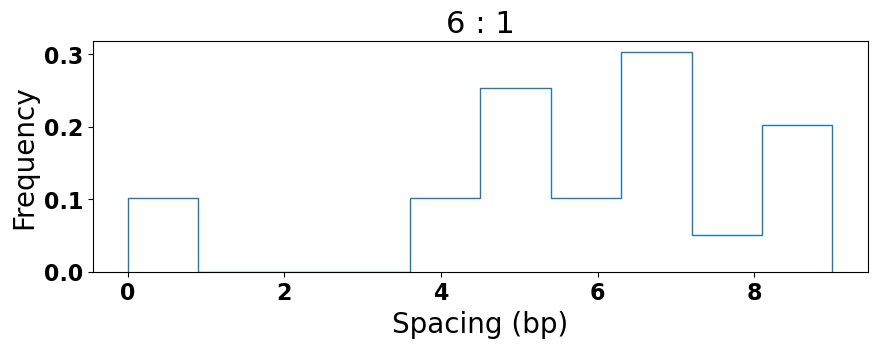

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

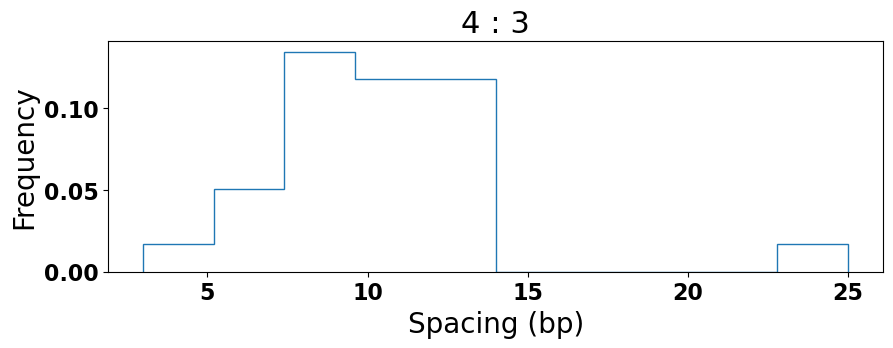

In [42]:
# Draw histograms of distances between pairs of motif instances
hit_configs = {}
for hit_set in motif_hits:
    hit_key = tuple([hit[1] for hit in hit_set])
    spacings = np.diff(np.sort([hit[0] for hit in hit_set]))
    spacings = spacings - conv_weights.shape[2]  # Subtract length of motifs
    try:
        hit_configs[hit_key].append(spacings)
    except KeyError:
        hit_configs[hit_key] = [spacings]

for key, spacings in hit_configs.items():
    if len(spacings) < 10 or len(key) != 2:
        # Ignore; too few examples to draw a curve or it's not just 2 motifs
        continue
    fig, ax = plt.subplots(figsize=(10, 3))
    spacings = np.concatenate(spacings)
    spacings = spacings[spacings < 30]
    ax.hist(spacings, bins=10, histtype="step", density=True)
    ax.set_title(" : ".join(["-".join([str(x) for x in t]) for t in key]))
    ax.set_xlabel("Spacing (bp)")
    ax.set_ylabel("Frequency")
    plt.show()

**Compare filter weights to true motif PFMs**

In [43]:
def compute_pfm_similarity(pfm_1, pfm_2):
    """
    Given an L1 x 4 NumPy array and L2 x 4 NumPy array, computes the
    similarity between them as the maximum sliding cross correlation.
    """
    # L1-normalize both
    pfm_1 = pfm_1 / np.sum(np.abs(pfm_1), axis=1, keepdims=True)
    pfm_2 = pfm_2 / np.sum(np.abs(pfm_2), axis=1, keepdims=True)

    return np.max(scipy.signal.correlate(pfm_1, pfm_2, mode="valid"))

In [44]:
# Import true PFMs
with open(motif_config_path, "r") as f:
    motif_config = json.load(f)
motif_files = motif_config["motif_files"]
if neg_motif_config_path:
    with open(neg_motif_config_path, "r") as f:
        neg_motif_config = json.load(f)
    motif_files.extend(neg_motif_config["motif_files"])
motif_files = list(set(motif_files))

true_pfms = {}
for motif_file in motif_files:
    true_pfms.update(motif_util.import_meme_motifs(motif_file))

In [45]:
# For each filter, compute the closest true PFM
for filter_i in range(len(conv_weights)):

    if not average_act_counts[filter_i]:
        # This filter is never activated
        print("%d\tN/A" % filter_i)
        continue
    
    filter_weights = np.transpose(conv_weights[filter_i])
    filter_weights = scipy.special.softmax(filter_weights, axis=1)
    filter_weights_rc = np.flip(filter_weights)

    pfm_sims = {
        pfm_key : compute_pfm_similarity(filter_weights, pfm)
        for pfm_key, pfm in true_pfms.items()
    }
    pfm_sims_rc = {
        pfm_key : compute_pfm_similarity(filter_weights_rc, pfm)
        for pfm_key, pfm in true_pfms.items()
    }
    all_pfm_sims = pfm_sims.copy()
    all_pfm_sims.update({key + "_RC" : sim for key, sim in pfm_sims_rc.items()})
    print("%d\t%s" % (
        filter_i,
        "\t".join(["%s:%.3f" % (key, all_pfm_sims[key]) for key in sorted(all_pfm_sims, key=(lambda k: -all_pfm_sims[k]))])
    ))

0	N/A
1	REST_right_exp:2.551	REST_right_exp_RC:2.511	REST_left_exp_RC:2.502	REST_left_exp:2.488	REST_left_sanit:2.271	REST_left_sanit_RC:2.255	REST_right_sanit:1.547	REST_right_sanit_RC:1.512
2	N/A
3	REST_left_exp_RC:2.556	REST_right_exp:2.508	REST_right_exp_RC:2.502	REST_left_exp:2.495	REST_left_sanit_RC:2.311	REST_left_sanit:2.244	REST_right_sanit_RC:1.528	REST_right_sanit:1.522
4	REST_right_exp_RC:2.549	REST_right_exp:2.509	REST_left_exp:2.503	REST_left_exp_RC:2.487	REST_left_sanit_RC:2.271	REST_left_sanit:2.255	REST_right_sanit_RC:1.545	REST_right_sanit:1.510
5	N/A
6	REST_right_exp:2.519	REST_left_exp:2.513	REST_right_exp_RC:2.511	REST_left_exp_RC:2.506	REST_left_sanit_RC:2.262	REST_left_sanit:2.262	REST_right_sanit:1.526	REST_right_sanit_RC:1.509
7	N/A


**Compute performance drop on sequences with different background composition**

In [46]:
# Create several backgrounds based on GC content
gc_percs_to_try = np.arange(0.1, 1.0, 0.1)
all_metrics = []
for gc_perc in gc_percs_to_try:
    gc_perc_half = gc_perc / 2
    
    # Create alternative data loader with different background
    alt_data_loader = simulated_dataset.dataset_ex.run(
        "create_data_loader", config_updates={
            "motif_config_path": motif_config_path,
            "input_length": 500,
            "motif_center_dist_bound": 50,
            "batch_size": 128,
            "num_batches": 1,
            "background_match_reject_prob": 1,
            "neg_motif_config_path": neg_motif_config_path,
            "bg_seq_freqs": np.array([0.5 - gc_perc_half, gc_perc_half, gc_perc_half, 0.5 - gc_perc_half])
        }
    ).result

    # Run batch
    alt_losses_batched, alt_losses, alt_model_outputs, alt_losses_comps, alt_model_outputs_other, alt_input_data = \
        train_model.run_epoch(alt_data_loader, "eval", model, epoch_num=0, return_extras=True)

    # Compute performance
    alt_true_labels, alt_pred_probs = np.squeeze(alt_input_data[1], axis=1), np.squeeze(alt_model_outputs, axis=1)
    metrics = performance.compute_performance_metrics(alt_true_labels, alt_pred_probs)
    all_metrics.append(metrics)

WARNING - root - Added new config entry: "motif_config_path"
WARNING - root - Added new config entry: "neg_motif_config_path"
WARNING - sim_dataset - No observers have been added to this run
INFO - sim_dataset - Running command 'create_data_loader'
INFO - sim_dataset - Started
/home/tsenga5/miniforge3/envs/grelu/lib/python3.12/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO - sim_dataset - Result: <torch.utils.data.dataloader.DataLoader object at 0x14fa0b078860>
INFO - sim_dataset - Completed after 0:00:00
	Loss: 0.1916: 100%|█████████████████████████████████████████████████████████████

WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Roboto' not found.
WARNING - matplotlib.font_manager - findfont: Font family 'Robot

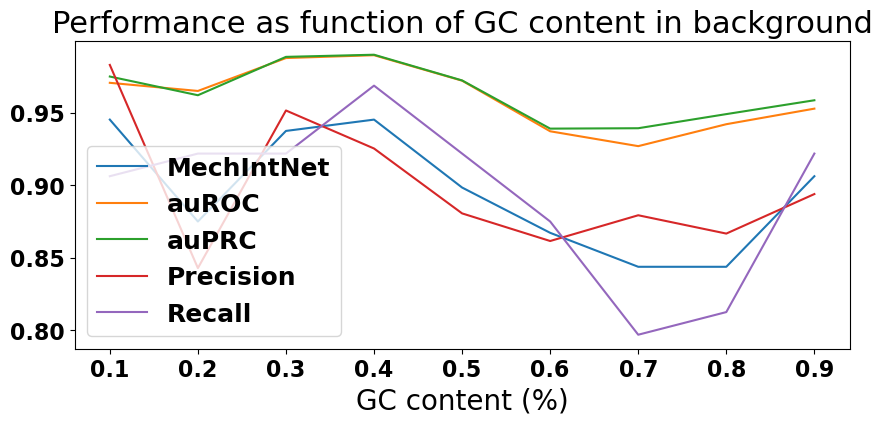

In [47]:
# Plot metrics as a function of GC content
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(gc_percs_to_try, [metrics["acc"] for metrics in all_metrics], label="Accuracy")
ax.plot(gc_percs_to_try, [metrics["auroc"] for metrics in all_metrics], label="auROC")
ax.plot(gc_percs_to_try, [metrics["auprc"] for metrics in all_metrics], label="auPRC")
ax.plot(gc_percs_to_try, [metrics["precis"] for metrics in all_metrics], label="Precision")
ax.plot(gc_percs_to_try, [metrics["recall"] for metrics in all_metrics], label="Recall")

ax.legend()
ax.set_xlabel("GC content (%)")
ax.set_title("Performance as function of GC content in background")
plt.show()